In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


In [78]:
df = pd.read_csv('data.csv')

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014000e-06,-0.000044,-0.000278,-6.710100e-06,-0.000015,-0.000113,0.010787,0.010831,0.011108,0.002458,...,-0.71593,1.6617,12.1770,-1.5040,-1.5041,-1.5044,-1.4984,-1.4985,-1.4984,5
1,-4.532700e-06,-0.000027,0.000115,2.347100e-07,-0.000022,-0.000318,0.025578,0.025605,0.025490,0.025175,...,-0.61186,2.1574,6.7002,-1.4944,-1.4944,-1.4940,-1.5048,-1.5048,-1.5049,8
2,-9.615600e-07,0.000002,-0.000006,4.854600e-06,0.000006,-0.000015,0.006317,0.006315,0.006321,-0.035309,...,-0.48252,6.0859,16.2140,-1.4998,-1.4998,-1.4998,-1.4975,-1.4975,-1.4975,9
3,1.856800e-06,-0.000013,-0.000139,-2.323100e-06,-0.000059,0.000184,0.008755,0.008768,0.008907,-0.041292,...,-0.69714,0.6127,5.6592,-1.5036,-1.5036,-1.5033,-1.4945,-1.4945,-1.4944,9
4,-1.833400e-06,0.000007,0.000011,-4.316300e-06,0.000001,0.000010,0.021416,0.021409,0.021399,-0.018570,...,-0.48441,4.3420,12.3630,-1.4993,-1.4993,-1.4993,-1.4978,-1.4978,-1.4978,6


In [62]:
counts = []

In [5]:
categories = list(df.columns.values)

In [6]:
categories

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48']

In [7]:
for i in categories:
    counts.append((i,df[i].sum()))

In [8]:
df_stats = pd.DataFrame(counts, columns=['category','total'])

In [9]:
df_stats

,category,total
0,0,-0.126719
1,1,0.069002
2,2,0.063057
3,3,-0.047535
4,4,0.063533
5,5,-0.012584
6,6,77.939747
7,7,77.870706
8,8,77.807638
9,9,-490.570916


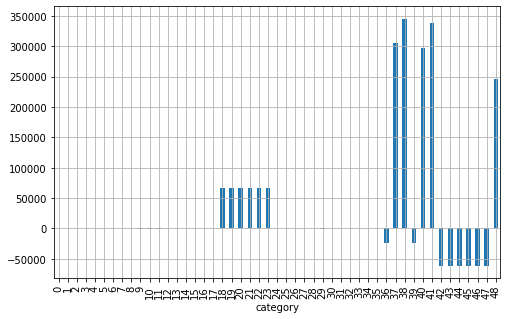

In [10]:
df_stats.plot(x='category', y='total', kind='bar', legend=False, grid=True, figsize=(8, 5))

In [80]:
y = df['48']

In [82]:
y.shape

(40956,)

In [59]:
X = df.iloc[:,0:48]

In [83]:
X.shape

(40956, 48)

# Making Train and Test data

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [87]:
y_test.shape

(12287,)

# Scaling the data

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fitting an SVM Model

In [90]:
from sklearn.svm import SVC

In [91]:
classifier=SVC(kernel ='linear', C=1, gamma=1)
classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
y_pred= classifier.predict(x_test)

# Calculating the accuracy score

In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.9990233580206722


# Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1117    0    0    0    0    0    0    0    0    0    0]
 [   0 1106    1    0    1    0    0    0    0    0    0]
 [   0    0 1109    0    0    0    0    0    0    0    0]
 [   0    0    0 1111    1    0    0    0    0    0    0]
 [   0    0    0    0 1101    1    0    0    0    0    0]
 [   0    0    0    0    0 1136    0    0    0    0    0]
 [   0    0    0    0    0    0 1143    0    0    0    0]
 [   0    0    0    0    0    0    1 1098    0    0    0]
 [   0    0    0    0    0    0    0    0 1107    5    0]
 [   0    1    0    0    0    0    0    0    1 1104    0]
 [   0    0    0    0    0    0    0    0    0    0 1143]]


In [95]:
classifier.support_vectors_

array([[ 2.51408005e-01, -5.79750023e-01,  7.39960569e-01, ...,
        -1.23386637e-01, -1.25466617e-01, -1.57992729e+00],
       [ 6.43990518e-02,  6.13855244e-02, -2.58884283e-02, ...,
         8.17058663e-01,  7.13597293e-01, -1.57992729e+00],
       [ 3.26287049e-01, -7.82501202e-02,  8.90514848e+00, ...,
         6.32995618e-03,  3.62013852e-03, -1.57992729e+00],
       ...,
       [-4.99574380e-02, -9.78083033e-01, -1.74376290e-01, ...,
         4.27908884e-01,  3.58608716e-01,  1.58314895e+00],
       [-8.50626676e-02,  1.86716012e+00, -9.31895499e-02, ...,
         2.00904846e-01,  1.64978583e-01,  1.58314895e+00],
       [-1.34764120e-01,  1.14268051e-01, -1.24200079e+00, ...,
         2.53580352e+00,  2.52081187e+00,  1.58314895e+00]])

In [104]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [108]:
# Perform 6-fold cross validation
scores = cross_val_score(classifier, X, y, cv=5)
scores

array([0.86833435, 0.85845027, 0.86589384, 0.86063271, 0.86571359])

# KNN 

In [11]:
y = df['48']
y.describe()

count    40956.00000
mean         6.00000
std          3.16227
min          1.00000
25%          3.00000
50%          6.00000
75%          9.00000
max         11.00000
Name: 48, dtype: float64

In [12]:
X = df.iloc[:,0:48]
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,40956.000000,4.095600e+04,4.095600e+04,40956.000000,4.095600e+04,4.095600e+04,40956.000000,40956.000000,40956.000000,40956.000000,...,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000,40956.000000
mean,-0.000003,1.684784e-06,1.539634e-06,-0.000001,1.551250e-06,-3.072557e-07,0.001903,0.001901,0.001900,-0.011978,...,8.432184,-0.593506,7.258343,8.253127,-1.500884,-1.500908,-1.500801,-1.497774,-1.497796,-1.497688
std,0.000052,5.370637e-05,2.269554e-04,0.000039,4.123210e-05,2.232578e-04,0.036471,0.036469,0.036474,0.066559,...,6.820285,6.087017,11.810857,6.456862,0.003660,0.003668,0.003629,0.003080,0.003079,0.003091
min,-0.008548,-5.414400e-03,-6.055700e-03,-0.007577,-2.144900e-03,-9.525100e-03,-0.131110,-0.131080,-0.130860,-0.218640,...,0.522180,-0.891000,-0.596830,0.513630,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300
25%,-0.000007,-1.431950e-05,-7.172800e-05,-0.000005,-1.457350e-05,-7.294200e-05,-0.019970,-0.019983,-0.019960,-0.032111,...,4.462375,-0.715682,1.464500,4.446575,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500
50%,-0.000003,8.599600e-07,5.411700e-07,-0.000001,7.762550e-07,9.330600e-08,0.013195,0.013202,0.013212,-0.015635,...,6.590350,-0.661935,3.319900,6.466500,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000
75%,0.000002,1.870625e-05,7.492125e-05,0.000004,1.884600e-05,7.122225e-05,0.024710,0.024715,0.024740,0.020655,...,9.994925,-0.573615,8.278650,9.862200,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200
max,0.005784,4.525300e-03,3.330400e-03,0.001453,8.245100e-04,2.641400e-03,0.068515,0.068515,0.068509,0.124680,...,125.490000,1161.700000,174.010000,106.140000,-1.458500,-1.465600,-1.469900,-1.448900,-1.451500,-1.447100


# Normalizing the data b/w 0 & 1

In [85]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
print(transformer)
transformer.transform(X)

Normalizer(copy=True, norm='l2')


array([[-2.12538891e-07, -3.11248891e-06, -1.95727587e-05, ...,
        -1.05662997e-01, -1.05670049e-01, -1.05662997e-01],
       [-4.66382044e-07, -2.79940351e-06,  1.18810278e-05, ...,
        -1.54833035e-01, -1.54833035e-01, -1.54843325e-01],
       [-4.96737064e-08,  7.89977036e-08, -3.29453280e-07, ...,
        -7.73600976e-02, -7.73600976e-02, -7.73600976e-02],
       ...,
       [-1.41232924e-07, -6.24011931e-07, -1.07713295e-05, ...,
        -3.84088158e-02, -3.84088158e-02, -3.84088158e-02],
       [-6.73483120e-08,  1.46808868e-08, -2.71705710e-07, ...,
        -2.55976188e-02, -2.55959109e-02, -2.55976188e-02],
       [-5.62781189e-07, -5.95964021e-06,  9.54322357e-06, ...,
        -1.34988049e-01, -1.34997076e-01, -1.34988049e-01]])

In [13]:
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [92]:
Y_test

9793      3
39777     2
32636     7
38263     8
7693      7
         ..
13659     3
20148     7
24540    11
5139     11
23070     3
Name: 48, Length: 4096, dtype: int64

# Fitting the KNN Model

In [89]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', p=2)
model.fit(X_train, Y_train)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [1]:
y = model.kneighbors(X_test)
index = y[1]
dist = y[0]
y_pred = []
for i in index:
    rows = Y_train.iloc[i]
    y_pred.append(rows.mode().iloc[0])

return y_pred


NameError: name 'model' is not defined

In [91]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(accuracy_score(Y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print(cm)

print(metrics.f1_score(Y_test, y_pred, average='weighted'))

0.117919921875
[[104  54  34  32  27  29  14  22  23  17  17]
 [ 82  65  45  28  40  25  12  14  22  23  16]
 [ 84  66  49  29  30  21  22  17  31  25  10]
 [ 62  51  43  47  26  24  22  29  24  19  18]
 [ 76  62  41  41  30  19  15  21  26  20  17]
 [ 84  62  45  32  24  33  25  18  14  17   9]
 [ 88  69  54  31  28  23  29  22  17  22  18]
 [ 92  41  34  50  31  18   8  30  28  15  14]
 [ 66  65  40  43  31  16  14  30  29  19  15]
 [ 81  56  34  23  31  32  23  24  22  28  18]
 [ 72  59  41  25  23  30  16  23  26  15  39]]
0.11322926009627049


In [70]:
from sklearn.manifold import TSNE

In [71]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(40956, 2)

In [72]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 40956 samples in 0.250s...
[t-SNE] Computed neighbors for 40956 samples in 40.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40956
[t-SNE] Computed conditional probabilities for sample 2000 / 40956
[t-SNE] Computed conditional probabilities for sample 3000 / 40956
[t-SNE] Computed conditional probabilities for sample 4000 / 40956
[t-SNE] Computed conditional probabilities for sample 5000 / 40956
[t-SNE] Computed conditional probabilities for sample 6000 / 40956
[t-SNE] Computed conditional probabilities for sample 7000 / 40956
[t-SNE] Computed conditional probabilities for sample 8000 / 40956
[t-SNE] Computed conditional probabilities for sample 9000 / 40956
[t-SNE] Computed conditional probabilities for sample 10000 / 40956
[t-SNE] Computed conditional probabilities for sample 11000 / 40956
[t-SNE] Computed conditional probabilities for sample 12000 / 40956
[t-SNE] Computed conditional probabilities for s

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# clf = RandomForestClassifier(max_depth=5, random_state=0)
estimator = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=0)
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=1000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [68]:
Y_pred = estimator.predict(X_test)

In [69]:
print(accuracy_score(Y_test, Y_pred))

0.9796532920973386


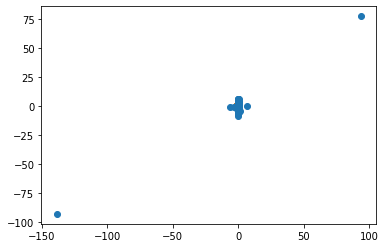

In [53]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1])

In [133]:
df_1 = df[df['48'] > 8]['48']
df_2 = df[df['48'] <= 8]['48']

In [153]:
l1 = df_1.index
l2 = df_2.index
print(l1)

Int64Index([    2,     3,     7,     9,    13,    25,    26,    35,    36,
               41,
            ...
            40921, 40923, 40931, 40936, 40939, 40945, 40949, 40950, 40954,
            40955],
           dtype='int64', length=11170)


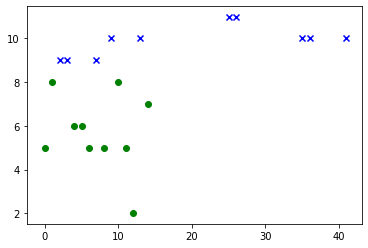

In [154]:
plt.scatter(df_1.index[0:10],df_1[0:10],color ='blue', marker='x')
plt.scatter(df_2.index[0:10],df_2[0:10],color ='green', marker='o')

In [181]:
df['48'].describe()

count    40956.00000
mean         6.00000
std          3.16227
min          1.00000
25%          3.00000
50%          6.00000
75%          9.00000
max         11.00000
Name: 48, dtype: float64

In [229]:
df_ind1 = df.index
df_ind2 = df['48'].sample(frac =.25)
df_ind2
df_ind2.index

2394      6
8084      3
14607     7
153       1
16609     3
         ..
29785     5
27893     3
8057      4
37048    11
8693     10
Name: 48, Length: 10239, dtype: int64

In [211]:
plt.plot(df.index.sample(frac =.25) , df['48'])

AttributeError: 'RangeIndex' object has no attribute 'sample'

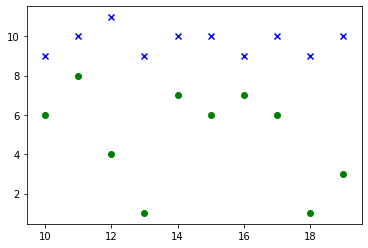

In [208]:
plt.scatter(df.ind[10:20],df_1[10:20],color ='blue', marker='x')
plt.scatter(df.index[10:20],df_2[10:20],color ='green', marker='o')